In [ ]:
#open akses google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 3.7MB/s 


In [ ]:
#-----------------------------------
# Import Library Pre-processing dan penyimpanan model
#-----------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import h5py

In [ ]:
# membuat wadah dataset yang akan digunakan
data_gambar='/content/drive/My Drive/flowers'

In [ ]:
#import library
import os

In [ ]:
# melakukan pengelompokan pada dataset
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(data_gambar):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
daisy         769
dandelion    1065
dtype: int64

In [ ]:
# import library pandas
import pandas as pd
#load library untuk train test split
from sklearn.model_selection import train_test_split
#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['tag']

In [ ]:
# split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [ ]:
# menyatukan kedalam masing-masing dataframe
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

In [ ]:
# import library
import shutil
from tqdm.notebook import tqdm as tq

In [ ]:
datasource_path = "/content/drive/My Drive/flowers/"
dataset_path = "/content/drive/My Drive/dataset/"

In [ ]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_te]).reset_index(drop=1)
print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(2)


set    tag      
test   daisy        146
       dandelion    221
train  daisy        623
       dandelion    844
dtype: int64 




,path,tag,set
1512,/content/drive/My Drive/flowers/dandelion/4134...,dandelion,test
1166,/content/drive/My Drive/flowers/daisy/79241740...,daisy,train


In [ ]:
# looping terhadap dataset untuk mengembalikan indeks setiap baris dan objek yang berisi baris itu sendiri
for index, row in tq(df_all.iterrows()):
    
    #d mendeteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    # membuat folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    # mendefinisikan file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    # mengcopy file dari source ke dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [ ]:
#--------------------
# tunable-parameters
#--------------------
images_per_class = 80
fixed_size       = tuple((500, 500))
train_path       = "/content/drive/My Drive/dataset/train"
h5_data          = '/content/drive/My Drive/dataset/output/data.h5'
h5_labels        = '/content/drive/My Drive/dataset/output/labels.h5'
bins             = 8

In [ ]:
# deskripsi fitur 1:  Hu Moments

def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [ ]:
# deskripsi fitur 2 : Haralick Texture 

def fd_haralick(image):
    # convert gambar ke grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # menghitung vektor fitur tekstur haralick 
    haralic = mahotas.features.haralick(gray).mean(axis=0)
    return haralic

In [ ]:
# deskripsi fitur 3 : Color Histogram

def fd_histogram(image, mask=None):
    # mengubah gambar menjadi ruang warna HSV
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #menghitung histogram warna
    hist  = cv2.calcHist([image],[0,1,2],None,[bins,bins,bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist,hist)
    # return the histogram
    return hist.flatten()
    

In [ ]:
# wadah untuk train_labels dari train_path
train_labels = os.listdir(train_path)

# sort the training labesl 
train_labels.sort()
print(train_labels)

# wadah untuk global_features dan labels
global_features = []
labels = []

i, j = 0, 0 
k = 0

# num of images per class 
images_per_class = 80

['daisy', 'dandelion']


In [ ]:
# import library mahotas
import mahotas
# iterate folder untuk mendapatkan nama label gambar

%time
# melakukan looping kepada data training dengan sub folder

for training_name in train_labels:
    # penggabungan training data path dan setiap folder pelatihan 
    dir = os.path.join(train_path, training_name)

    # mendapatkan label pelatihan
    current_label = training_name

    k = 1
    # perulangan terhadap gambar di setiap sub-folder
        
    for file in os.listdir(dir):

        file = dir + "/" + os.fsdecode(file)
       
        # membaca gambar dan resize gambar menjadi fixed-size
        
        image = cv2.imread(file)
        if image is not None:
             
            image = cv2.resize(image,fixed_size)
            fv_hu_moments = fd_hu_moments(image)
            fv_haralick   = fd_haralick(image)
            fv_histogram  = fd_histogram(image)


        # Concatenate global features
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)

        i += 1
        k += 1
    print("[STATUS] processed folder: {}".format(current_label))
    j += 1

print("[STATUS] completed Global Feature Extraction...")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
[STATUS] processed folder: daisy
[STATUS] processed folder: dandelion
[STATUS] completed Global Feature Extraction...


In [ ]:
%time
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le = LabelEncoder()
target = le.fit_transform(labels)
print("[STATUS] training labels encoded...{}")
# normalize the feature vector in the range (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))
# save the feature vector using HDF5
h5f_data = h5py.File('/content/drive/My Drive/dataset/output/data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('/content/drive/My Drive/dataset/output/labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
[STATUS] feature vector size (1467, 532)
[STATUS] training Labels (1467,)
[STATUS] training labels encoded...{}
[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 ... 1 1 1]
[STATUS] target labels shape: (1467,)
[STATUS] end of training..


In [ ]:
#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

#--------------------
# tunable-parameters
#--------------------
num_trees = 100
test_size = 0.10
seed      = 9
train_path = "/content/drive/My Drive/dataset/train"
test_path  = "/content/drive/My Drive/dataset/test"
h5_data    = '/content/drive/My Drive/dataset/output/data.h5'
h5_labels  = '/content/drive/My Drive/dataset/output/labels.h5'
scoring    = "accuracy"

# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()

if not os.path.exists(test_path):
    os.makedirs(test_path)

# create all the machine learning models
models = []
models.append(('SVM', SVC(random_state=seed)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))

# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[STATUS] features shape: (1467, 532)
[STATUS] labels shape: (1467,)
[STATUS] training started...


In [ ]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)
print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (1320, 532)
Test data   : (147, 532)
Train labels: (1320,)
Test labels : (147,)


SVM: 0.694697 (0.052273)
CART: 0.715152 (0.045857)
LDA: 0.671212 (0.058210)


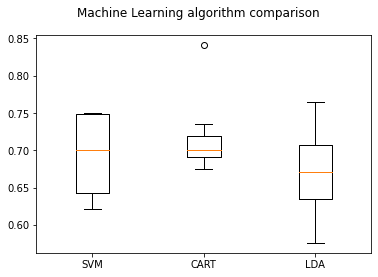

In [ ]:
# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Saving 8684108_a85764b22d_n.jpg to 8684108_a85764b22d_n.jpg


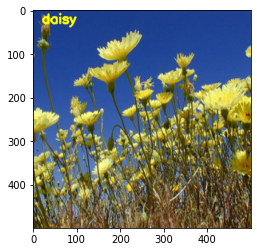

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
uploaded = files.upload()
# create the model - Random Forests
svm  = SVC(random_state=seed)

# fit the training data to the model
svm.fit(trainDataGlobal, trainLabelsGlobal)

# loop through the test images
for file in uploaded.keys():    

    #file = test_pathi + "/" + file
    # read the image
    part = file
    image = cv2.imread(part)

    # resize the image
    image = cv2.resize(image, fixed_size)

    # Global Feature extraction
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)

    # Concatenate global features

    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

    # predict label of test image
    prediction = svm.predict(global_feature.reshape(1,-1))[0]

    # show predicted label on image
    cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)

    # display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

Saving 8684108_a85764b22d_n.jpg to 8684108_a85764b22d_n (4).jpg


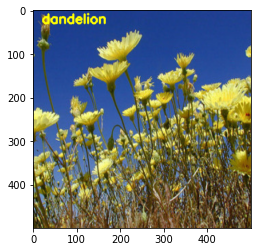

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
uploaded = files.upload()
# create the model - Random Forests
cart  = DecisionTreeClassifier(random_state=seed)

# fit the training data to the model
cart.fit(trainDataGlobal, trainLabelsGlobal)

# loop through the test images
for file in uploaded.keys():    

    #file = test_pathi + "/" + file
    # read the image
    part = file
    image = cv2.imread(part)

    # resize the image
    image = cv2.resize(image, fixed_size)

    # Global Feature extraction
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)

    # Concatenate global features

    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

    # predict label of test image
    prediction = cart.predict(global_feature.reshape(1,-1))[0]

    # show predicted label on image
    cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)

    # display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

Saving 8684108_a85764b22d_n.jpg to 8684108_a85764b22d_n (5).jpg


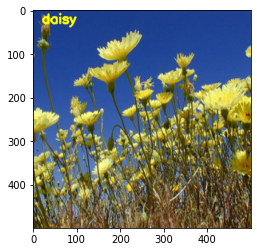

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
uploaded = files.upload()
# create the model - Random Forests
lda  = LinearDiscriminantAnalysis()

# fit the training data to the model
lda.fit(trainDataGlobal, trainLabelsGlobal)

# loop through the test images
for file in uploaded.keys():    

    #file = test_pathi + "/" + file
    # read the image
    part = file
    image = cv2.imread(part)

    # resize the image
    image = cv2.resize(image, fixed_size)

    # Global Feature extraction
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)

    # Concatenate global features

    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

    # predict label of test image
    prediction = lda.predict(global_feature.reshape(1,-1))[0]

    # show predicted label on image
    cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)

    # display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()